**This notebook showcases data cleaning and predictions performed on 1,000 molecules compounds represented by SMILES to conduct a Model Bias Evaluation in the Ersilia Model Hub.**

**The dataset used is "reference_library.csv" shared by the mentor for the contribution phase of outreachy Internship 2024.**

# Data Pre-Processing

In [1]:
#Installing necessary Libraries and specifying path to relevant folders
!pip install rdkit
!pip install standardiser
# In this codeblock I will import the necessary packages and specify the paths to relevant folders
from rdkit import RDLogger
import logging
from os import path, remove
from rdkit import Chem
from rdkit import Chem
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import seaborn as sns
import sys

# Disable warning messages
logging.getLogger("standardiser.standardise").setLevel(logging.ERROR)
RDLogger.DisableLog('rdApp.error')
RDLogger.DisableLog('rdApp.warning')

sys.path.append('../src')
DATAPATH = "../data"
FIGUREPATH = "../figures/"

In [2]:
# Loading the data from the /content folder to a Pandas dataframe and inspect the columns
data = pd.read_csv("/content/reference_library.csv")

In [3]:
data.head()

,smiles
0,CCCCNC(=S)N/N=C/C1=C(C)C=CS1
1,CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1
2,O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl
3,O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...
4,CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...


In [4]:
## Mount google drive
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Cloning the Git repository
!git clone https://github.com/KiitanTheAnalyst/Ersilia---Olaitan-Suru

fatal: destination path 'Ersilia---Olaitan-Suru' already exists and is not an empty directory.


In [6]:
#converting the molecules to standard SMILES by using the function standardise_smiles from /src
import sys
sys.path.append('/content/Ersilia---Olaitan-Suru/src')

from smiles_processing import standardise_smiles

smiles_list = data['smiles'].tolist()
data['standardised_smiles'] = standardise_smiles(smiles_list)

In [8]:
# checking the data types of columns in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   smiles               1000 non-null   object
 1   standardised_smiles  997 non-null    object
dtypes: object(2)
memory usage: 15.8+ KB


In [8]:
import pandas as pd
from smiles_processing import smiles_to_inchikey

# Assuming 'data' is your DataFrame with 'standardised_smiles' column
data['standardised_smiles'].fillna('NaN', inplace=True)
data['inchi_key'] = data['standardised_smiles'].apply(smiles_to_inchikey)


In [9]:
data.head(5)

,smiles,standardised_smiles,inchi_key
0,CCCCNC(=S)N/N=C/C1=C(C)C=CS1,CCCCNC(=S)N/N=C/c1sccc1C,SUTWUYBMBWPLMW-MDWZMJQESA-N
1,CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1,Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1,RIYHJWOTNJXDLV-UHFFFAOYSA-N
2,O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl,O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl,OGNBARHGQVMGGX-UHFFFAOYSA-N
3,O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...,O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1,WQEXDIRUOYNDCM-UHFFFAOYSA-N
4,CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...,CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1,YEGVLLQDOGYWDQ-OAHLLOKOSA-N


In [10]:
# Saving the data as a .csv file containing only the standardised smiles and the inchikey as columns.
output_file = "/content/drive/MyDrive/Ersilia/standardised_smile_and_inchikey"

if path.exists(output_file):
    remove(output_file)

col = ['standardised_smiles', 'inchi_key']
updated_data = pd.DataFrame(data, columns=col)
updated_data.to_csv("/content/drive/MyDrive/Ersilia/standardised_smile_and_inchikey.csv", index = False)

In [11]:
#Inspect the new dataframe
df = pd.read_csv("/content/drive/MyDrive/Ersilia/standardised_smile_and_inchikey.csv")
df.head(5)

,standardised_smiles,inchi_key
0,CCCCNC(=S)N/N=C/c1sccc1C,SUTWUYBMBWPLMW-MDWZMJQESA-N
1,Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1,RIYHJWOTNJXDLV-UHFFFAOYSA-N
2,O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl,OGNBARHGQVMGGX-UHFFFAOYSA-N
3,O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1,WQEXDIRUOYNDCM-UHFFFAOYSA-N
4,CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1,YEGVLLQDOGYWDQ-OAHLLOKOSA-N


# Model Bias Evaluation

In [12]:
#installing miniconda and Ersilia
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

In [13]:
!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

--2024-03-23 21:30:32--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh.1’

Miniconda3-py37_4.1 100%[===================>] 100.13M   291MB/s    in 0.3s    

2024-03-23 21:30:32 (291 MB/s) - ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh.1’ saved [104996770/104996770]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | done

# All requested packages already installed.

installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    

In [14]:
!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
!python -m pip install pandas
!rm $MINICONDA_INSTALLER_SC

import sys

_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

  Cloning https://github.com/ersilia-os/ersilia.git to /tmp/pip-req-build-b5ayjuf0
  Running command git clone -q https://github.com/ersilia-os/ersilia.git /tmp/pip-req-build-b5ayjuf0
  Resolved https://github.com/ersilia-os/ersilia.git to commit 8bc77c0917794cf2fc8685fe359301a8348617d7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
rm: missing operand
Try 'rm --help' for more information.


In [15]:
# Enter the model name
# This is just an example, make sure to adapt it to your specific model

model_name = "eos6oli"  # @param {type:"string"}

In [16]:
# @title 📥 Fetch the model
import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")

⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
[]
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:35535
   PID: 15281
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
⛔ Model eos6oli closed
👍 Model eos6oli fetched successfully!
Time taken: 185.23 seconds


In [17]:
# @title ⚙️ Serve the model

# returns available APIs (calculate or predict)

!ersilia serve $model_name

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:59385
   PID: 16039
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


In [18]:
# # Running the predictions

# mdl.serve()
# start = time.time()
# st_smiles = list(data['standardise_smiles'])
# output = mdl.run(st_smiles, output = "pandas")
# end = time.time()
# print("Predictions calculated. Time taken:", end - start)
# mdl.close()

 #@title ⚡ Run predictions
api = "calculate"  # @param {type:"string"}

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
std_smiles = list(data['standardised_smiles'])
output = model.api(input=std_smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()

Successful 👍! Time taken: 56.46 seconds


In [19]:
#printing the predictions as solubility
output

,key,input,solubility
0,SUTWUYBMBWPLMW-MDWZMJQESA-N,CCCCNC(=S)N/N=C/c1sccc1C,-3.454
1,RIYHJWOTNJXDLV-UHFFFAOYSA-N,Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1,-4.502
2,OGNBARHGQVMGGX-UHFFFAOYSA-N,O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl,-2.900
3,WQEXDIRUOYNDCM-UHFFFAOYSA-N,O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1,-4.777
4,YEGVLLQDOGYWDQ-OAHLLOKOSA-N,CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1,-4.473
...,...,...,...
995,RGKVPYQYBUAAEH-UHFFFAOYSA-N,CCCn1c(-c2cnc(Nc3ccc(C)nc3)c(Cl)c2)nc2cccc(Cl)c21,-7.525
996,VTRFEMUYHTXFEQ-UHFFFAOYSA-N,CN(Cc1cccc2ccccc12)Cn1nc(-c2ccncc2)oc1=O,-4.242
997,QDFOYTHIYBSDPW-RGAOVNQFSA-N,O=C(N[C@@H](CSCc1ccccc1)C(=O)Nc1ccc(C2S/C(=N\c...,-8.070
998,YZQZXLROYFNFQE-QTGUNEKASA-N,CN1CC[C@]23CCCC[C@H]2[C@H]1Cc1ccc(Oc2ccccc2F)cc13,-5.465


In [21]:
#Converting the output into a pandas dataframe
output = pd.DataFrame(output, columns=['key', 'input', 'solubility'])

# Specifying path to save the CSV file
file_path = '/content/drive/MyDrive/Ersilia/Model Bias Files/output.csv'

# Saving DataFrame as a CSV file
output.to_csv(file_path, index=False)

# Distribution of Predicted Values

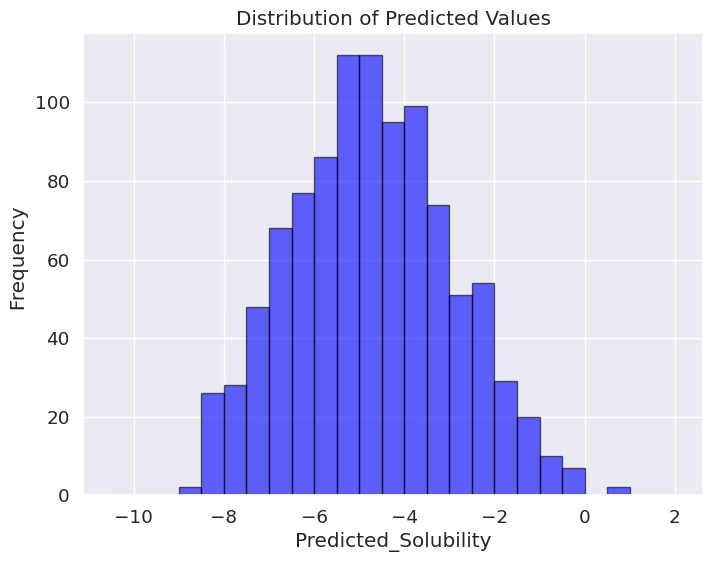

In [35]:
# Plots to observe the distribution of predicted values
import matplotlib.pyplot as plt
bins=list(np.arange(-10.5,2.5,.5))

plt.figure(figsize=(8, 6))
plt.hist(output['solubility'], bins=bins, color='blue', edgecolor='black', alpha=0.6)
plt.ylabel('  Frequency')
plt.xlabel('Predicted_Solubility')
plt.title('Distribution of Predicted Values')

figure_path = '/content/drive/MyDrive/Ersilia/Figures/Histogram_Plot.png'
plt.savefig(figure_path)



**This plot shows the distribution of solubility values. It gives an idea of the frequency of solubility values in the dataset. In this case, it appears that most compounds have solubility values concentrated around -5.**

In [27]:
from rdkit import Chem
from rdkit.Chem import DataStructs, AllChem
import numpy as np
from sklearn.decomposition import PCA


# Morgan Fingerprint funtion
def generate_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    finger_prints = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    array = np.zeros((1,), dtype=np.int8)
    Chem.DataStructs.ConvertToNumpyArray(finger_prints, array)
    return array

# Threshold set for hERG inhibitors
hERG_blockers_threshold = 0.5

output['Fingerprint'] = output['input'].apply(generate_fingerprint)

fingerprints = np.vstack(output['Fingerprint'])
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(fingerprints)

output.head()

,key,input,solubility,Fingerprint
0,SUTWUYBMBWPLMW-MDWZMJQESA-N,CCCCNC(=S)N/N=C/c1sccc1C,-3.454,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
1,RIYHJWOTNJXDLV-UHFFFAOYSA-N,Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1,-4.502,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
2,OGNBARHGQVMGGX-UHFFFAOYSA-N,O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl,-2.900,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,WQEXDIRUOYNDCM-UHFFFAOYSA-N,O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1,-4.777,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,YEGVLLQDOGYWDQ-OAHLLOKOSA-N,CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1,-4.473,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


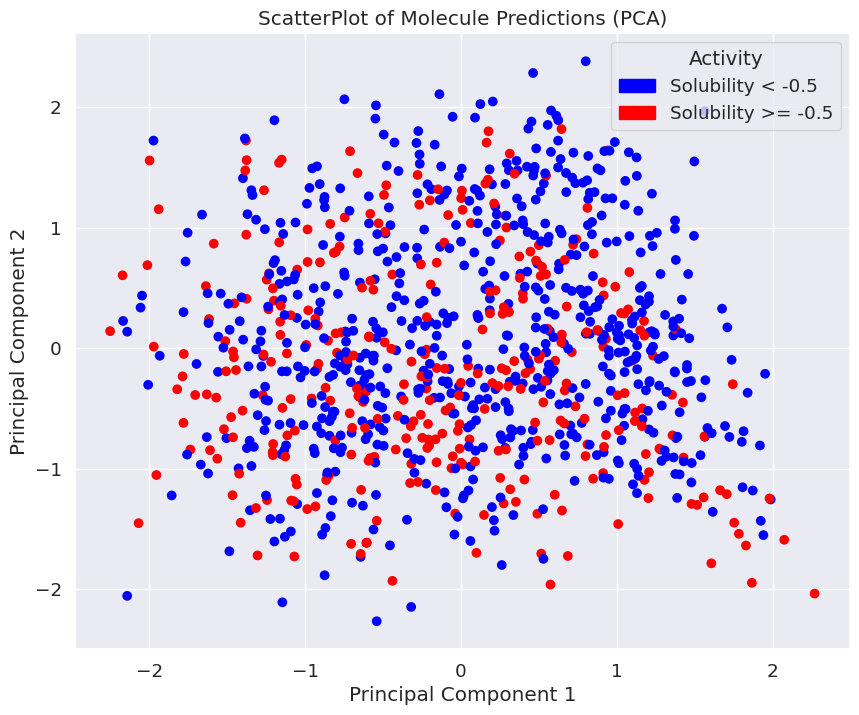

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Define custom colormap with specified colors
cmap = mcolors.ListedColormap(['blue', 'red'])

# Plot scatterplot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=output['solubility'], cmap=cmap)
plt.title('ScatterPlot of Molecule Predictions (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Define custom legend labels and colors
legend_labels = ['Solubility < -0.5', 'Solubility >= -0.5']
legend_colors = ['blue', 'red']
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=legend_patches, loc='upper right', title='Activity')

# Save the figure
figure_path = '/content/drive/MyDrive/Ersilia/Figures/Scatterplot.png'
plt.savefig(figure_path)

plt.show()


**The scatterplot shows the distribution of molecules in the reduced two-dimensional space. Points that are clustered together indicate molecules with similar fingerprints. The clusters on this plot shows that molecules with similar fingerprints have similar solubility value.**

**The distribution of colors around this plot indicates the pink color as regions with prediction probability less than 0.5 which indicates lower solubilty, and purple color as areas of high solubility with prediction probability equals or greater than 0.5. From the plot, quite a number of molecules displays low solubility. This result of this showed no bias**